times: [ 2307.5506  2307.571   2307.5914 ...,  2381.3501  2381.3706  2381.391 ] flux: [ 0.99473243  0.99477619  0.9952254  ...,  1.0030991   1.0031343   1.0031294 ]


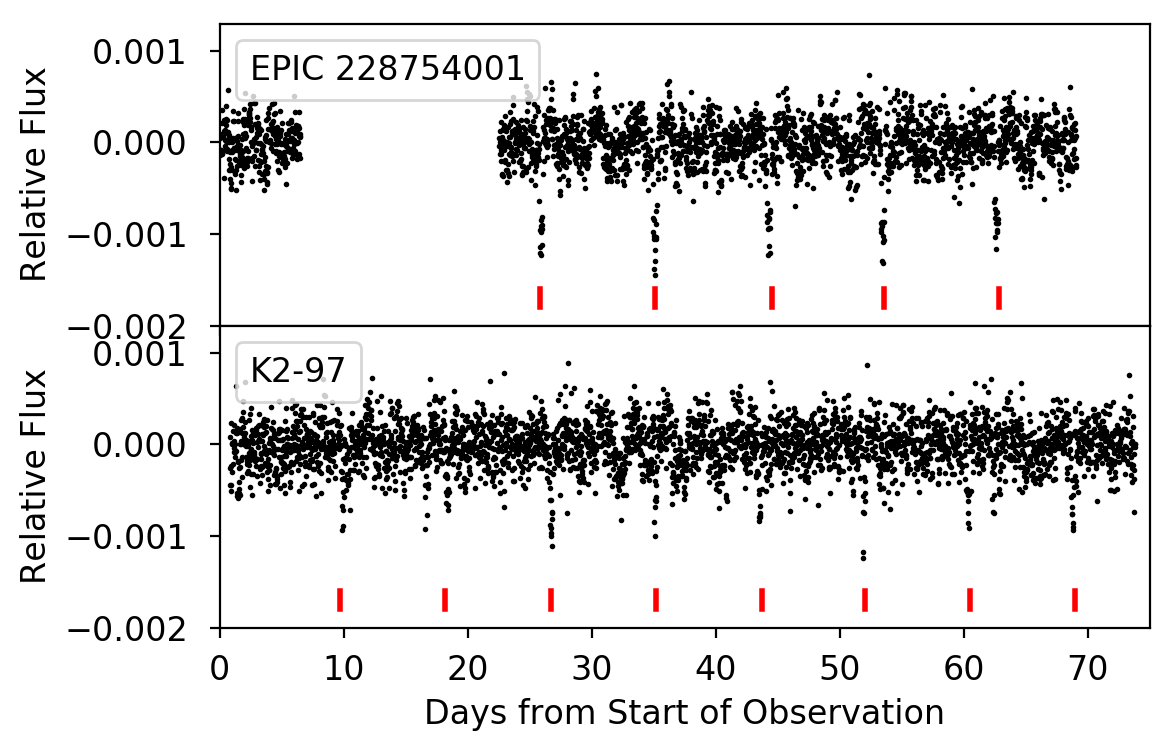

(array([  4.32370568e-05,   4.41968629e-05,   4.34687733e-05, ...,
         2.46606642e-05,   2.46606642e-05,   2.46606642e-05]), 9.176914220879983, 0.00015620807353576848, 0.000944678784401375, 0.02813405047579644, 807, 839)
Best-fitting stellar parameters
zpt: 8.871091086708087e-06
ld1: 0.6505
ld2: 0.1041

Best-fitting planet parameters for planet 0
period: 9.175830634232282
T0: 7.550847788122187
impact: 0.8508259713439437
rprs: 0.03513511825991547

{'zpt': 8.8710910867080871e-06, 'ld1': 0.65049999999999997, 'ld2': 0.1041}
{'period': 9.1758306342322822, 'T0': 7.5508477881221872, 'impact': 0.85082597134394367, 'rprs': 0.035135118259915471}
transit model shape: (2417,)


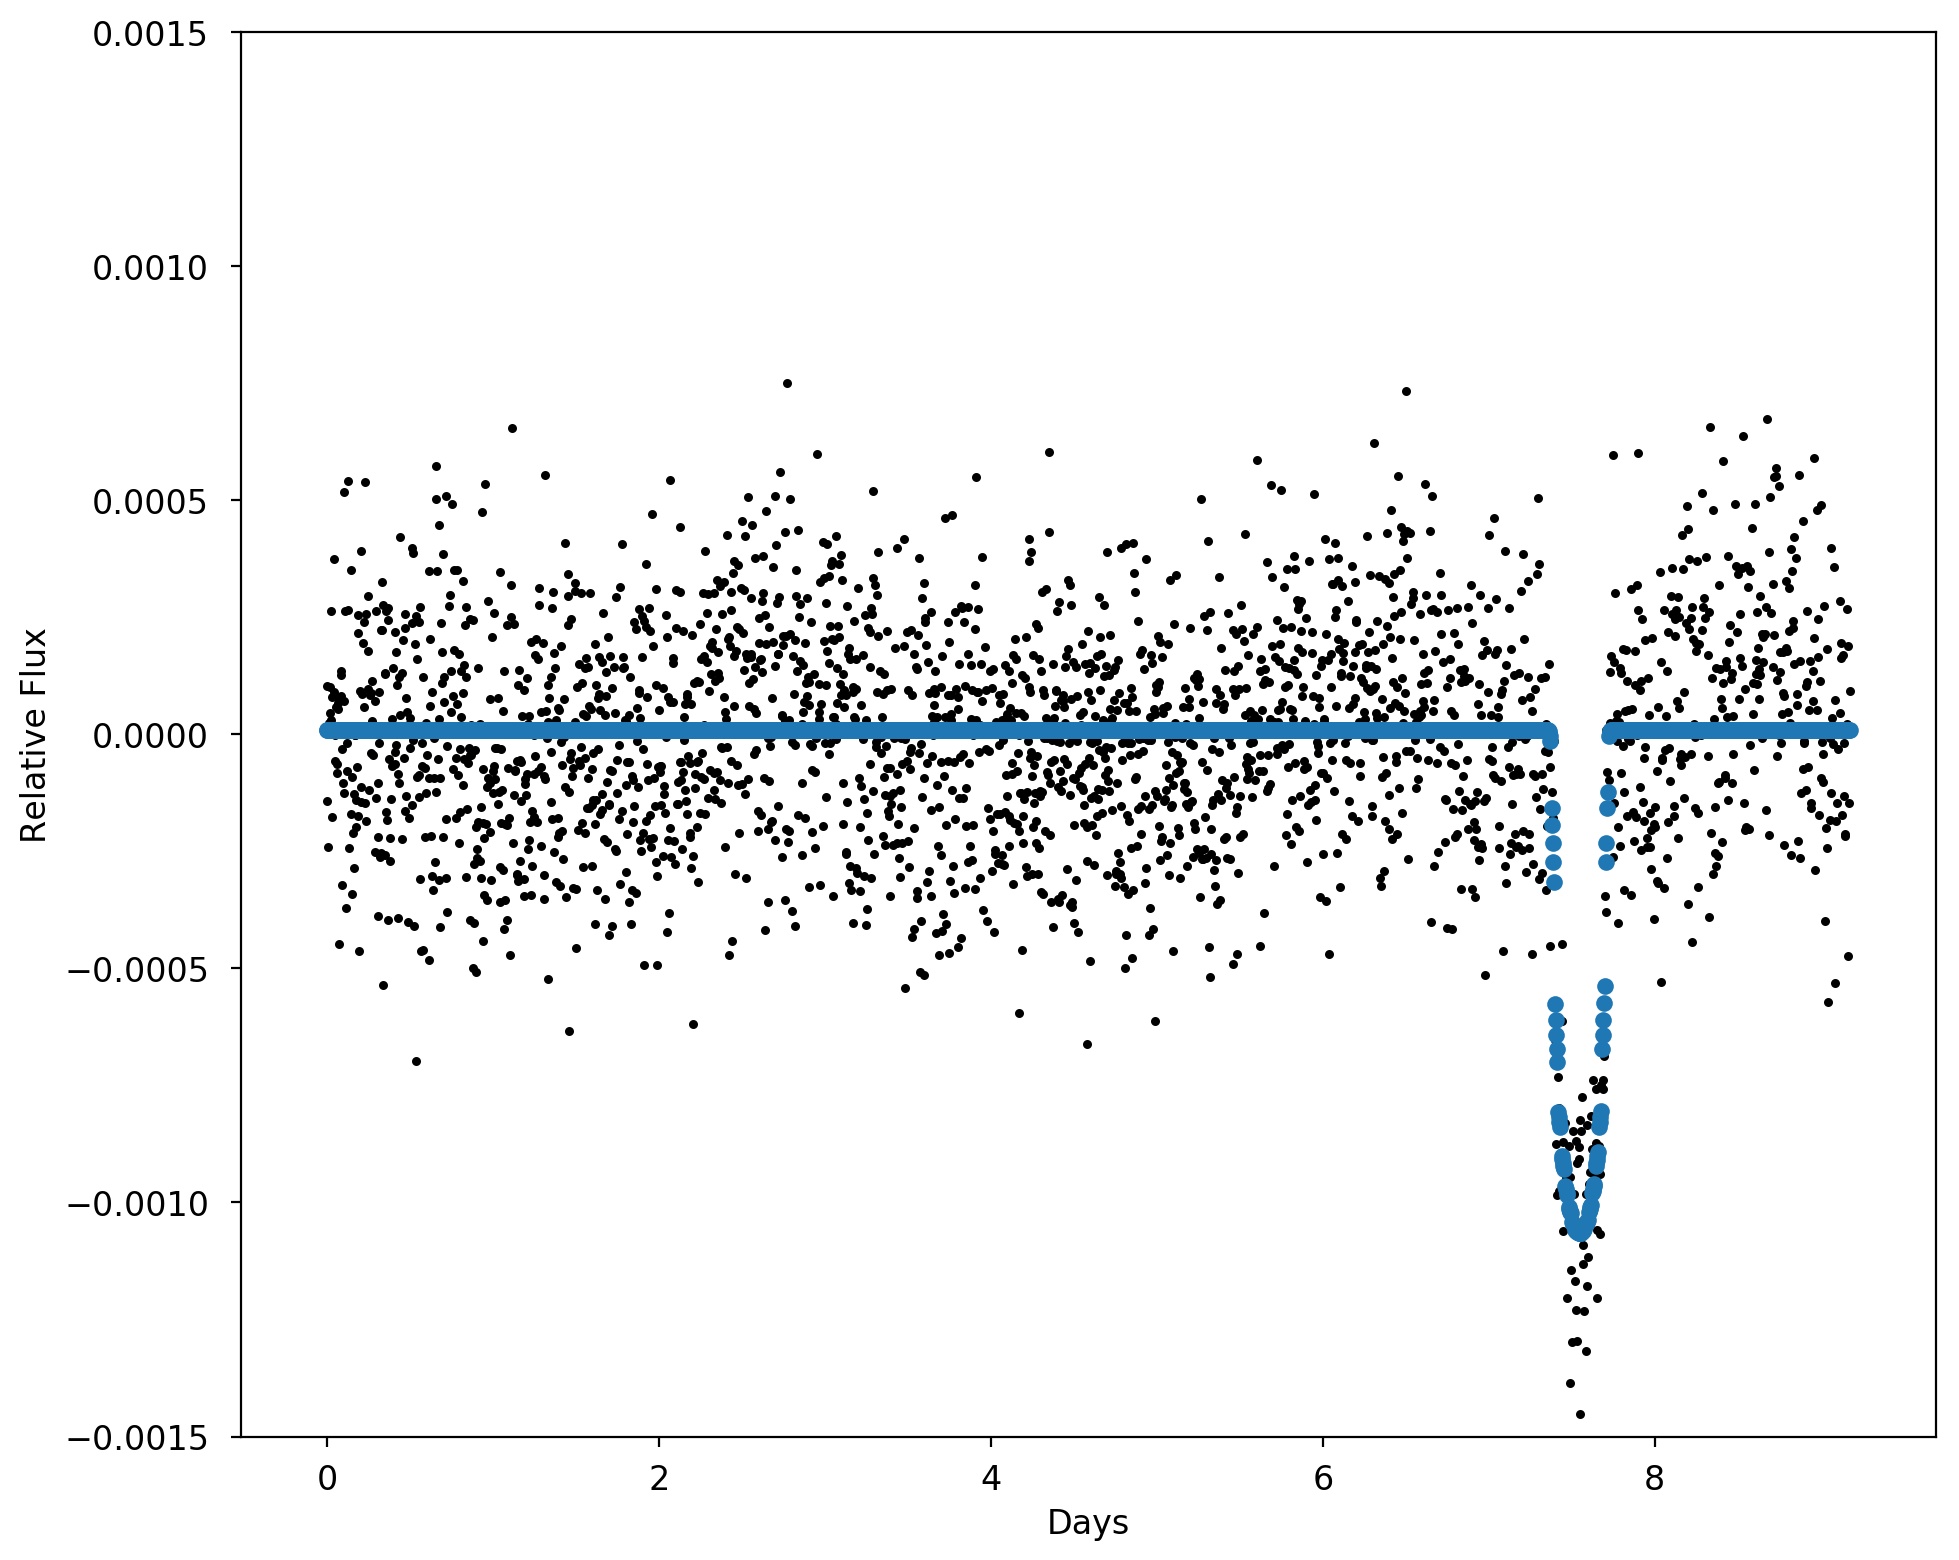

distpred shape (5000, 2417)
Xpred shape (5000, 1)
Kss shape (5000, 5000)
Ks.Shape (5000, 2417) b.shape (2417, 1)
GP shape (5000,) GP_cov shape (5000,) Xpred revised  shape (5000,)


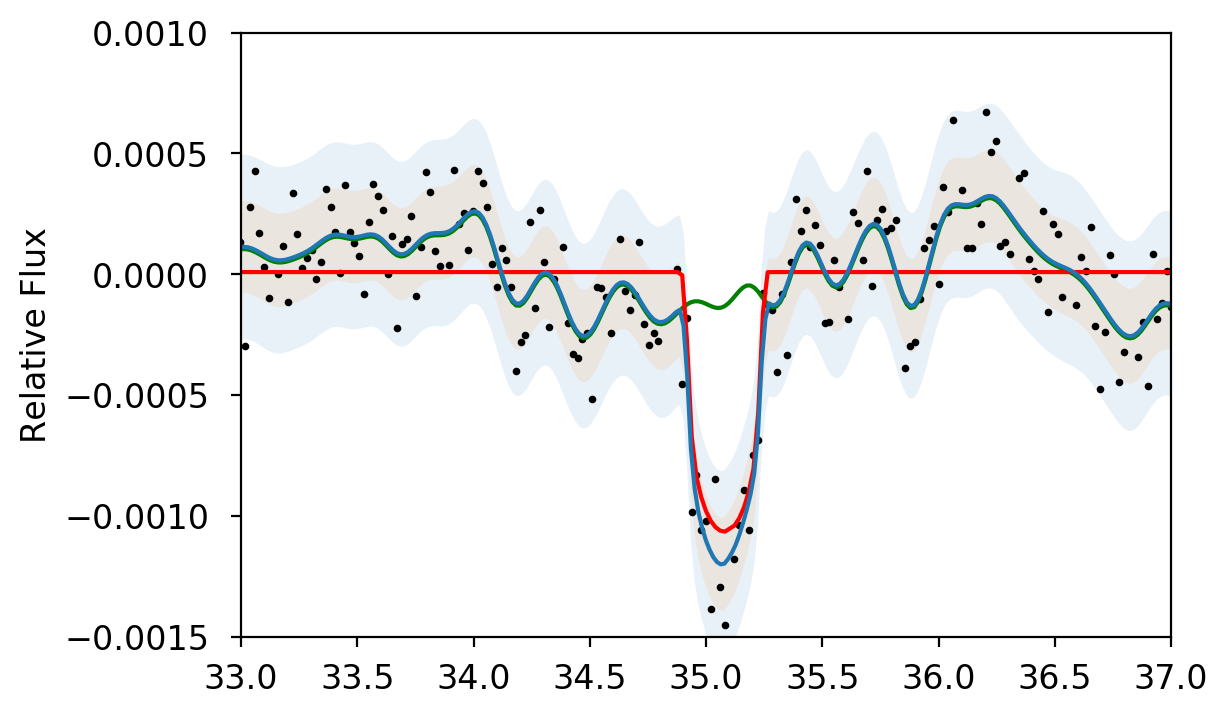

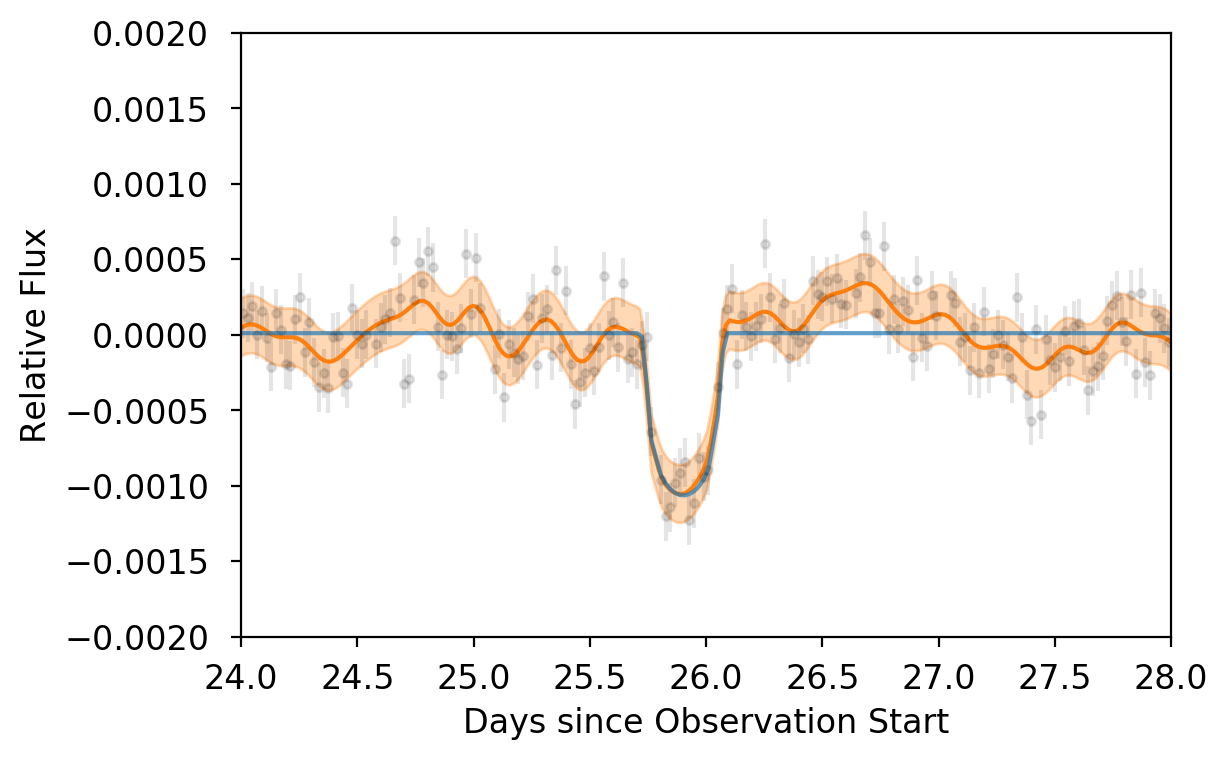

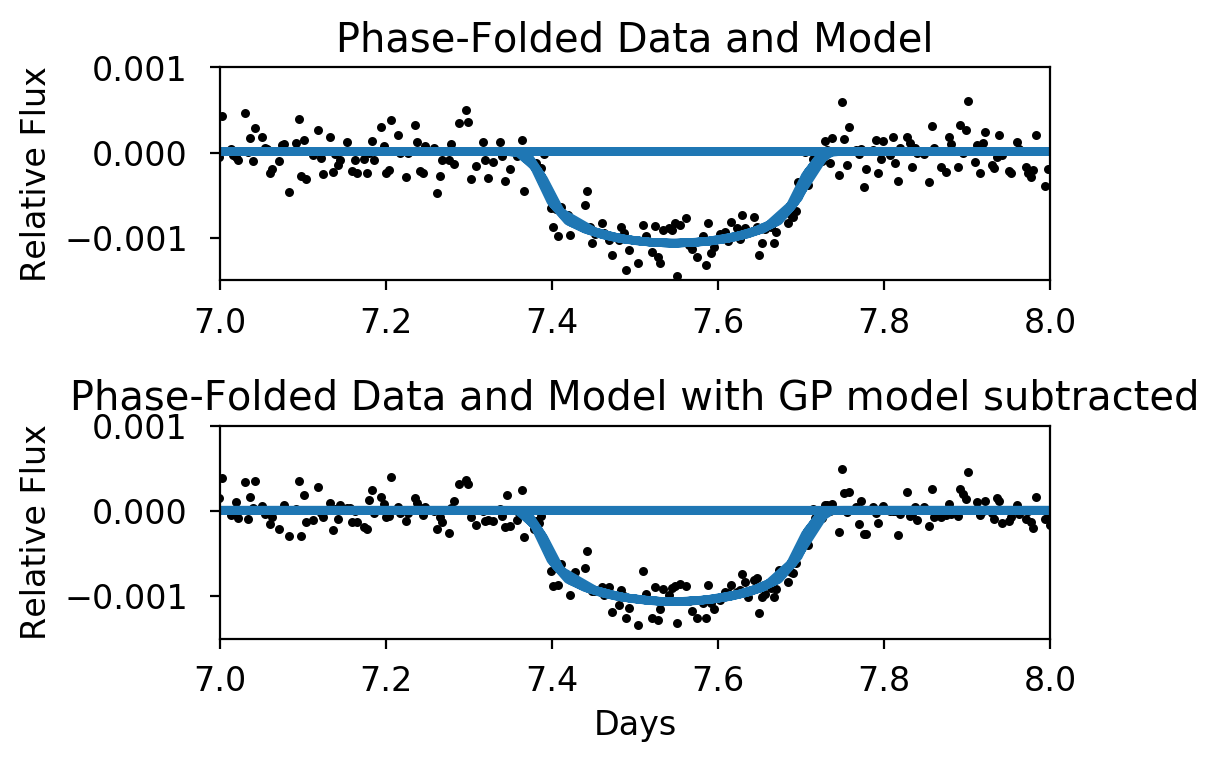

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import scipy.ndimage
import scipy.spatial
import scipy.linalg
import bls
import re
from astropy.io import fits # TERRA, everest

%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['xtick.major.width'] = 3
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['xtick.minor.width'] = 3
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['ytick.major.width'] = 3
# plt.rcParams['ytick.minor.size'] = 5
# plt.rcParams['ytick.minor.width'] = 3
# plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size']=12
plt.rcParams['mathtext.default']='regular'
plt.rcParams['lines.markersize']=6
plt.rcParams['xtick.major.pad']='6'
plt.rcParams['ytick.major.pad']='8'
cm = plt.cm.get_cmap('RdYlBu')




#create time and flux arrays

# example using manual reading of fits files
#hduL = fits.open('211351816.fits') #TERRA
#fm2 = np.ma.masked_array(hduL['optimum_lc'].data['fdt_t_rollmed'], hduL['optimum_lc'].data['fmask']) #TERRA
#t = np.ma.masked_array(hduL['lc-shared'].data['t'], hduL['optimum_lc'].data['fmask']) #TERRA
#ftimes = np.ma.compressed(t) #TERRA
#fflux = np.ma.compressed(fm2/np.mean(fm2)) #TERRA
#hdu = fits.open('hlsp_everest_k2_llc_211351816-c05_kepler_v1.0_lc.fits') #Everest
#ftimes, fflux = np.nan_to_num(hdu[1].data['TIME']), np.nan_to_num(hdu[1].data['FLUX']/np.nanmean(hdu[1].data['FLUX'])) #Everest
##remove nans
#dellist = [] #Everest
#for i in range(len(ftimes)): #Everest
#    if ftimes[i] == 0.0 or fflux[i] == 0.0: #Everest
#        dellist.append(i) #Everest
#ftimes, fflux = np.delete(ftimes, dellist), np.delete(fflux, dellist) #Everest
#print len(times), len(flux)

## f = open('times.txt')
## times = f.read().split('\n')
## f.close()
## #print times
## times = times[:-1] #remove last empty string
## timesarray = np.zeros(len(times))
## for i in range(len(times)):
##     timesarray[i] = float(times[i]) - float(times[0]) #time relative to first data point

## #print timesarray[0],  timesarray[-1] - timesarray[0], timesarray.shape

## f = open('corrflux.txt')
## corrflux = f.read().split('\n')
## f.close()
## corrflux = corrflux[:-1]
## #median normalize and median filter
## array = np.zeros(len(corrflux))
## for i in range(len(corrflux)):
##     array[i] = float(corrflux[i])
## print array
## array = array / np.median(array)
## model = scipy.ndimage.filters.median_filter(array, size=120)
## flux = array-model
## print flux


#K2-97

#times are BJD - 2454833
#f = open('211351816.oxf.ts.txt') #oxf, sff, filt(ARC)
f = open('/Users/samuelgrunblatt/Documents/Papers/2113paper/epic211351816simult.csv') #simult
#times = f.read()#('     ','\n') # OXF, sff, arc
#time, flux = times.split('\n')
#data = re.split('     |\n', times) # OXF, sff, arc
data = f.read().split() #simult
#f.close()
#print "data[0]", data[10], "[-1]", data[-1]
#print data[:10]
#data= data[1:-1] #OXF, sff, arc
#ftime = data[:-1:2] #OXF, sff, arc
#flux = np.array([float(i[:-1]) for i in ftime]) #OXF, sff, arc
#fflux = data[1::2] #OXF, sff, arc
#times = np.array([float(i[:-1]) for i in fflux]) #OXF, sff, arc
ftime = data[7::4] #simult
times = np.array([float(i[:-1]) for i in ftime]) #simult
fflux = data[8::4] #simult
flux = np.array([float(i[:-1]) for i in fflux]) #simult
#times = np.array([float(i) for i in ftimes]) #TERRA, Everest
#flux = np.array([float(i) for i in fflux]) #TERRA, Everest

print( "times:", times, "flux:", flux)
timesarray = np.zeros_like(times)
for i in range(len(times)):
    timesarray[i] = float(times[i]) - float(times[0]) #time relative to first data point
#print(np.min(time))
#time=time-np.min(time)

timesarray2 = np.zeros_like(times)
flux2 = np.zeros_like(times)
timesarray2, flux2 = timesarray, flux
flux2 = flux2 - scipy.ndimage.filters.median_filter(flux2, 150)

#k2-97: remove edge effect at beginning of campaign
edgemask = (timesarray2 < 0.8) 
#print(-edgemask)
timesarray2 = timesarray2[~edgemask]
flux2 = flux2[~edgemask]

#EPIC2287
data = np.loadtxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/228754001.dat.ts')


#EPIC20113
#import everest
#star = everest.Everest(201132839)
#time = star.apply_mask(star.time)
#flux = star.apply_mask(star.fraw)
#data = np.loadtxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC201132839/201132839.dat.ts')
timesarray = data[:,0] - data[0,0]
flux = (data[:,1]-1)# * 1e3

#2287: remove edge effect during midcampaign break
edgemask = (timesarray > 6.5) * (timesarray < 22.5)
#print(-edgemask)
timesarray = timesarray[~edgemask]
flux = flux[~edgemask]



#flux=flux-1.
flux = flux - scipy.ndimage.filters.median_filter(flux, 150)
ferr = np.median(np.abs(np.diff(flux)))

#print timesarray,flux

# gs1 = gridspec.GridSpec(3, 3)
# gs1.update(left=0.05, right=0.48, wspace=0.05)
# ax1 = plt.subplot(gs1[:-1, :])
# ax2 = plt.subplot(gs1[-1, :-1])
# ax3 = plt.subplot(gs1[-1, -1])

plt.clf()
fig = plt.figure(1, figsize=(20,8))
gs2 = gridspec.GridSpec(2, 9, height_ratios=[0.3,0.3], width_ratios=[2,2,2,2,2,2,2,2,2])
gs2.update(hspace=0.0)
ax4 = plt.subplot(gs2[0, :])
ax5 = plt.subplot(gs2[-1, :])
#ax6 = plt.subplot(gs2[-1, -1])

#plt.ion()

#fig, ax = plt.subplots()

# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['xtick.major.width'] = 3
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['xtick.minor.width'] = 3
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['ytick.major.width'] = 3
# plt.rcParams['ytick.minor.size'] = 5
# plt.rcParams['ytick.minor.width'] = 3
# plt.rcParams['axes.linewidth'] = 3
# plt.rcParams['font.size']=18
# plt.rcParams['font.family']='serif'
#fig = plt.figure(1,(20,6))
#plt.figure(figsize=(6,3))
#ax = fig.add_subplot(111)
#ax.set_aspect(0.5)
ax4.scatter(timesarray, flux, s=1, c='k', label='EPIC 228754001')
#ax4.text()
#epic2287 ticks
ax4.plot((25.85, 25.85), (-0.0018,-0.0016), 'r-', lw=2)
ax4.plot((35.1, 35.1), (-0.0018,-0.0016), 'r-', lw=2)
ax4.plot((44.5, 44.5), (-0.0018,-0.0016), 'r-', lw=2)
ax4.plot((53.6, 53.6), (-0.0018,-0.0016), 'r-', lw=2)
ax4.plot((62.8, 62.8), (-0.0018,-0.0016), 'r-', lw=2)
ax4.legend(loc=2, numpoints=1, handlelength=0, markerscale=0, handletextpad=0)
ax4.set_ylabel('Relative Flux')
ax4.set_ylim([-0.002,0.0013])
ax4.set_xlim([0,75])

majorLocator = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(5)
ax4.xaxis.set_major_locator(majorLocator)
ax4.xaxis.set_major_formatter(majorFormatter)
ax4.xaxis.set_minor_locator(minorLocator)
#ax4.grid()
ax4.set_xticklabels('')


#k2-97
ax5.scatter(timesarray2, flux2, s=1, c='k', label='K2-97')

#k2-97 ticks
ax5.plot((9.7, 9.7), (-0.0018,-0.0016), 'r-', lw=2)
ax5.plot((18.2, 18.2), (-0.0018,-0.0016), 'r-', lw=2)
ax5.plot((26.7, 26.7), (-0.0018,-0.0016), 'r-', lw=2)
ax5.plot((35.2, 35.2), (-0.0018,-0.0016), 'r-', lw=2)
ax5.plot((43.7, 43.7), (-0.0018,-0.0016), 'r-', lw=2)
ax5.plot((52.0, 52.0), (-0.0018,-0.0016), 'r-', lw=2)
ax5.plot((60.5, 60.5), (-0.0018,-0.0016), 'r-', lw=2)
ax5.plot((69.0, 69.0), (-0.0018,-0.0016), 'r-', lw=2)
#ax5.plot((1.2, 1.2), (-0.0015,-0.0013), 'r-', lw=2)
ax5.legend(loc=2, numpoints=1, handlelength=0, markerscale=0, handletextpad=0)
#fig = plt.gcf()
ax5.set_xlabel('Days from Start of Observation')
ax5.set_ylabel('Relative Flux')
ax5.set_xlim([0,75])
ax5.set_ylim([-0.002,0.0013])

#majorFormatter = FormatStrFormatter('%.2f')

#ax.xaxis.set_major_formatter(majorFormatter)
#ax5.grid()

#plt.tight_layout()
#fig.savefig('lightcurve.png')
plt.show()


##remove outliers
#dellist=[]
#for i in range(len(flux)):
#    if abs(flux[i]) > 0.0015:
#        dellist.append(i)
#timesarray = np.delete(timesarray,dellist)
#flux = np.delete(flux,dellist)


#initialize BLS fit
#corrflux = np.array(corrflux)
min_period = 6
max_period = 10
min_duration_hours = 5.
max_duration_hours = 15.



u = np.empty_like(timesarray)
v = np.empty_like(flux)
#print timesarray.shape, flux.shape, u.shape, v.shape
df = 0.00001 #frequency bin spacing
nf = (1./min_period)/df #number of frequency bins
fmin = 1./((max_period)*1.1) #minimum frequency
#print fmin, 1./max_period
nb = 1000. #number of bins in folded lightcurve: ~2 points per bin
qmi =  (min_duration_hours/24.)/max_period #minimum transit duration
#qmi = 0.04
qma = (max_duration_hours/24.)/min_period #maximum transit duration
#qma = 0.1
min_period = 6
max_period = 10
min_duration_hours = 5.
max_duration_hours = 15.


u = np.empty_like(timesarray)
v = np.empty_like(flux)
#print timesarray.shape, flux.shape, u.shape, v.shape
df = 0.00001 #frequency bin spacing
nf = (1./min_period)/df #number of frequency bins
fmin = 1./((max_period)*1.1) #minimum frequency
#print fmin, 1./max_period
nb = 1000. #number of bins in folded lightcurve: ~2 points per bin
qmi =  (min_duration_hours/24.)/max_period #minimum transit duration
#qmi = 0.04
qma = (max_duration_hours/24.)/min_period #maximum transit duration
#qma = 0.1

#run
results = bls.eebls(timesarray, flux, u, v, nf, fmin, df, nb, qmi, qma)

print( results)

power, best_per, best_power, depth, q, in1, in2 = results

#plot power spectrum
#plt.plot(np.arange(fmin,fmin+(df*(len(results[0])-1)),df),results[0])
#plt.ylabel('Power')
#plt.xlabel('Frequency (1/day)')
#plt.show()

#plot folded lightcurve
#best_per = 8.41
timesarraymod = timesarray % best_per
#plt.scatter(timesarraymod, flux, s=5,c='k')
#plt.xlim(0.5, 3)
#plt.xlabel('Days')
#plt.ylabel('Relative Flux')
#plt.show()

## #cut out transits
## modindex = (best_per / (timesarray[-1] - timesarray[0])) * len(timesarray)
## print 'modindex:', modindex
## dellist = []
## for i in range(len(timesarray)):
##     if float(in1)/nb < (i % int(modindex))/modindex < float(in2)/nb: # why are q, in2 so small? q should be ~8h, but measured 5h
##         dellist.append(i)
## print dellist        
## timesarraydel = np.delete(timesarray, dellist)
## timesarraymoddel = np.delete(timesarraymod, dellist)
## fluxdel = np.delete(flux, dellist)

#plt.scatter(timesarraymoddel, fluxdel, s=5, c='k')
#plt.xlim(0.5, 3)
#plt.title('Phase Folded Data with Transit Removed')
#plt.xlabel('Days')
#plt.ylabel('Relative Flux')
#plt.show()

#do with ktransit
from ktransit import FitTransit
import ktransit


fitT = FitTransit()

#K2-97
#fitT.add_guess_star(rho=0.02, zpt=0, ld1=0.6505,ld2=0.1041)
#fitT.add_guess_planet(T0=1.5, period=best_per, impact=0.94, rprs=0.03) #simult, sff

#EPIC2287
fitT.add_guess_star(rho=0.0265, zpt=0, ld1=0.6505,ld2=0.1041)
fitT.add_guess_planet(T0=7.5, period=best_per, impact=0.88, rprs=0.03) #simult, sff


#EPIC20113
#fitT.add_guess_star(rho=0.008, zpt=0, ld1=0.6505,ld2=0.1041) 
#fitT.add_guess_planet(T0=3.9, period=8.66, impact=0.4, rprs=0.017) #simult, sff


#fitT.add_guess_planet(T0=2.5, period=best_per, impact=0.94, rprs=0.03) #oxf, terra, ARC
#fitT.add_guess_planet(period=0.5)
fitT.add_data(time=timesarray,flux=flux)
#fitT.add_data(time=M.time, flux = tmod)

vary_star = ['zpt', 'ld1', 'ld2']      # free stellar parameters
vary_planet = (['period',       # free planetary parameters
        'T0', 'impact',
        'rprs'])                # free planet parameters are the same for every planet you model

fitT.free_parameters(vary_star, vary_planet)
fitT.do_fit()                   # run the fitting

fitT.print_results()            # print some results
res=fitT.fitresultplanets
res2=fitT.fitresultstellar
print( res2)
print( res['pnum0'])
print( "transit model shape:", fitT.transitmodel.shape)

fig = ktransit.plot_results(timesarray,flux,fitT.transitmodel)
#fig = ktransit.plot_results(M.time, tmod,fitT.transitmodel)
#fig.savefig('my_beautiful_fit.png')
#fig.show()


plt.clf()
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['xtick.major.width'] = 3
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['xtick.minor.width'] = 3
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['ytick.major.width'] = 3
# plt.rcParams['ytick.minor.size'] = 5
# plt.rcParams['ytick.minor.width'] = 3
# plt.rcParams['axes.linewidth'] = 3
# plt.rcParams['font.size']=18
# plt.rcParams['font.family']='serif'
#fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_aspect(0.3)
#plt.figure(figsize=(6,3))
plt.scatter(timesarraymod, flux, s=5, c='k')
plt.scatter(timesarraymod, fitT.transitmodel, lw=0)
#plt.title('Phase-Folded Data and Model')
plt.xlabel('Days')
plt.ylabel('Relative Flux')
#plt.xlim(1.2,2.8)
plt.ylim(-0.0015,0.0015)
plt.tight_layout()
#plt.savefig('my_beautiful_folded_fit.png')
plt.show()


#subtract transit fit from data and fit resids with GP
fluxtransitsub = flux - fitT.transitmodel
#plt.scatter(timesarraymod, fluxtransitsub)
#plt.show()


#prepare covariance matrix K
X = scipy.matrix([timesarray]).T #x coords of input values
xpred = np.r_[0:80:5000j]
Xpred = scipy.matrix([xpred]).T # x coords of output (prediction)
#for now, make Xpred equal to X
#Xpred = X
dist = scipy.spatial.distance.cdist(X, X, 'sqeuclidean')
distpred = scipy.spatial.distance.cdist(Xpred, X, 'sqeuclidean')
distss = scipy.spatial.distance.cdist(Xpred, Xpred, 'sqeuclidean')
print( "distpred shape", distpred.shape)
print( "Xpred shape", Xpred.shape)

h = 335*1e-6
lambd = 0.13 #days
theta = 0.01 #days
w = 1.0 #between 0 and 1? frac of period
sigma = 230*1e-6

#2287
h = 193*1e-6
lambd = 0.091
sigma = 178*1e-6

K = scipy.matrix(h**2 * scipy.exp(-dist/(2*lambd**2)) + sigma**2 *scipy.identity(X.shape[0]))
Ks = scipy.matrix(h**2 * scipy.exp(-distpred/(2*lambd**2)))# + [sigma**2 *scipy.identity(X.shape[0])[i] for i in range(X.shape[0])])
Kss = scipy.matrix(h**2 * scipy.exp(-distss/(2*lambd**2)) + [sigma**2 *scipy.identity(Xpred.shape[0])[i] for i in range(Xpred.shape[0])])
print( 'Kss shape', Kss.shape)
#Kper = scipy.matrix(h**2 * scipy.exp(- (np.sin(np.pi * dist/(theta)))**2 / (2. * w**2)) + sigma**2 * scipy.identity(X.shape[0]))
#Ksper = scipy.matrix(h**2 * scipy.exp(- (np.sin(np.pi * distpred/(theta)))**2 / (2. * w**2)))# + sigma**2 * scipy.identity(X.shape[0]))
#Kssper = scipy.matrix(h**2 * scipy.exp(- (np.sin(np.pi * distss/(theta)))**2 / (2. * w**2)) + sigma**2 * scipy.identity(Xpred.shape[0]))

#Kqp = scipy.matrix(h**2 * scipy.exp(- (np.sin(np.pi * dist/(theta)))**2 / (2. * w**2) - (dist**2/(2*lambd**2))) + sigma**2 * scipy.identity(X.shape[0]))
#Ksqp = scipy.matrix(h**2 * scipy.exp(- (np.sin(np.pi * distpred/(theta)))**2 / (2. * w**2) - (distpred**2/(2*lambd**2))))# + sigma**2 * scipy.identity(X.shape[0]))
#Kssqp = scipy.matrix(h**2 * scipy.exp(- (np.sin(np.pi * distss/(theta)))**2 / (2. * w**2) - (distss**2/(2*lambd**2))) + sigma**2 * scipy.identity(Xpred.shape[0]))



L = scipy.linalg.cho_factor(K)
b = scipy.linalg.cho_solve(L, scipy.matrix([fluxtransitsub]).T) #input arrays must be a certain shape: all columns, 1 row
print( 'Ks.Shape', Ks.shape, "b.shape", scipy.matrix(b).shape)
GP_meanfunc = np.array(Ks*scipy.matrix(b)).flatten()
b = scipy.linalg.cho_solve(L, Ks.T)
GP_cov = scipy.array(scipy.sqrt(np.diag(Kss - Ks * scipy.matrix(b)))).flatten()

#GP_meanfunc = GP_meanfunc[:,np.newaxis]
#GP_cov = GP_cov[:,np.newaxis]
print( "GP shape", GP_meanfunc.shape, "GP_cov shape", GP_cov.shape, "Xpred revised  shape", np.ravel(Xpred).shape)



plt.clf()
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['xtick.major.width'] = 3
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['xtick.minor.width'] = 3
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['ytick.major.width'] = 3
# plt.rcParams['ytick.minor.size'] = 5
# plt.rcParams['ytick.minor.width'] = 3
# plt.rcParams['axes.linewidth'] = 3
# plt.rcParams['font.size']=18
# plt.rcParams['font.family']='serif'
# fig = plt.figure()
#ax = fig.add_subplot(211)
#ax.set_aspect(3)
#plt.figure(figsize=(6,3))
plt.plot(np.ravel(Xpred), GP_meanfunc, 'g')
plt.plot(timesarray, fitT.transitmodel, 'r')
plt.plot(np.ravel(Xpred), GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel))
plt.fill_between(np.ravel(Xpred), \
                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)+2*GP_cov, \
                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)-2*GP_cov, alpha=0.1)
plt.fill_between(np.ravel(Xpred), \
                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)+GP_cov, \
                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)-GP_cov, alpha=0.1)
plt.scatter(timesarray, flux , s=3, c='k')

plt.xlim(33.0,37.0)
plt.ylim(-0.0015,0.001)
#plt.xlabel('Days', fontsize='small')
plt.ylabel('Relative Flux')
plt.show()
plt.clf()
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
#ax = fig.add_subplot(212)
#ax.set_aspect(3)
#plt.figure(figsize=(6,3))
#plt.plot(np.ravel(Xpred), GP_meanfunc, 'g')
color = "#ff7f0e"
plt.errorbar(timesarray, flux, yerr=ferr, capsize=0, fmt='.k', alpha=0.1)
plt.plot(np.ravel(Xpred), GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel), color=color)
#plt.fill_between(np.ravel(Xpred), \
#                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)+2*GP_cov, \
#                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)-2*GP_cov, alpha=0.1, color=color)
plt.fill_between(np.ravel(Xpred), \
                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)+GP_cov, \
                 GP_meanfunc+np.interp(np.ravel(Xpred), timesarray, fitT.transitmodel)-GP_cov, alpha=0.3, color=color)
plt.plot(timesarray, fitT.transitmodel, alpha=0.7)


plt.xlim(24,28)
plt.ylim(-0.002,0.002)
plt.xlabel('Days since Observation Start')
plt.ylabel('Relative Flux')
#plt.tight_layout()
#plt.savefig('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287GPandtransit.png')
#plt.savefig('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC201132839/2011GPandtransit.png')
plt.show()

plt.clf()
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['xtick.major.width'] = 3
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['xtick.minor.width'] = 3
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['ytick.major.width'] = 3
# plt.rcParams['ytick.minor.size'] = 5
# plt.rcParams['ytick.minor.width'] = 3
# plt.rcParams['axes.linewidth'] = 3
# plt.rcParams['font.size']=18
plt.subplots_adjust(left=0.16, bottom=0.09, right=0.94, top=0.96, wspace=0.2, \
        hspace=0.25)
plt.subplot(2,1,1)
plt.scatter(timesarraymod, flux, s=5, c='k')
plt.plot(timesarraymod, fitT.transitmodel, lw=3)
plt.title('Phase-Folded Data and Model')
#plt.xlabel('Days')
plt.ylabel('Relative Flux')
plt.xlim(7,8)
plt.ylim(-0.0015,0.0010)
plt.subplot(2,1,2)
#ax.set_aspect(0.3)
#plt.figure(figsize=(6,3))
plt.scatter(timesarraymod, flux-np.interp(timesarray, np.ravel(Xpred),GP_meanfunc), s=5, c='k')
plt.plot(timesarraymod, fitT.transitmodel, lw=3)
plt.title('Phase-Folded Data and Model with GP model subtracted')
plt.xlabel('Days')
plt.ylabel('Relative Flux')
plt.xlim(7,8)
plt.ylim(-0.0015,0.0010)
plt.tight_layout()
#plt.savefig('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287my_beautiful_folded_resids.png')
#plt.savefig('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC201132839/2011my_beautiful_folded_resids.png')
plt.show()

## #make phase folded plot
## plt.clf()
## #plt.figure(figsize=(6,3))
## plt.scatter(timesarraymod, flux-GP_meanfunc, s=5, c='k')
## plt.scatter(timesarraymod,fitT.transitmodel)
## #plt.title('Phase-Folded Data with GP meanfunction removed and Transit Model')
## plt.xlabel('Days')
## plt.ylabel('Relative Flux')
## plt.xlim(1.0,2.0)
## plt.ylim(-0.0015,0.0015)
## plt.savefig('my_beautiful_folded_fit.png')
## plt.show()




MCMC step runtime (in seconds): 22.91516399383545
        MCMC estimated total runtime (in seconds): 114575.81996917725
        Start time: Wed, 28 Jun 2017 09:52:24
        
Running MCMC...
Done.
End time: Thu, 29 Jun 2017 12:24:32
MCMC result:
lncov_amp = -8.847250162235321 +0.040536237242225326 -0.04405754865389078 
lncov_length = -2.9965569127050995 +0.07694091469213271 -0.07881897988344777
lnsigma = -8.690942815437886 +0.01906381101066934 -0.019338038690419168 
rprs = 0.03498266657538865 +0.0008287507122185234 -0.0007933309464697239
lnperiod = 2.2163777270540153 +0.00020524822542355992 -0.00020570086939075694 
impact = 0.8508433492164641 +0.007194412540003525 -0.006754089104357708
T0 = 7.5595180477625545 +0.007733025433895868 -0.008381942794062347 
rho = 0.026684245418765632 +0.001000860077426089 -0.0009858016849934245

Mean acceptance fraction: 0.460


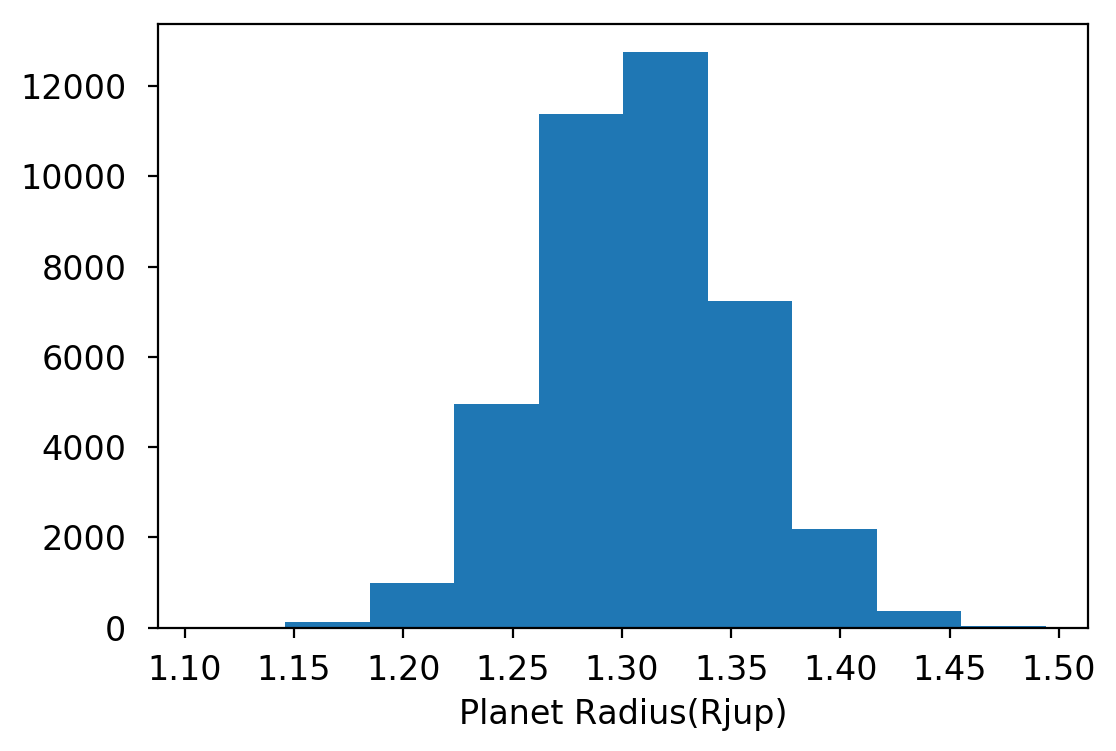

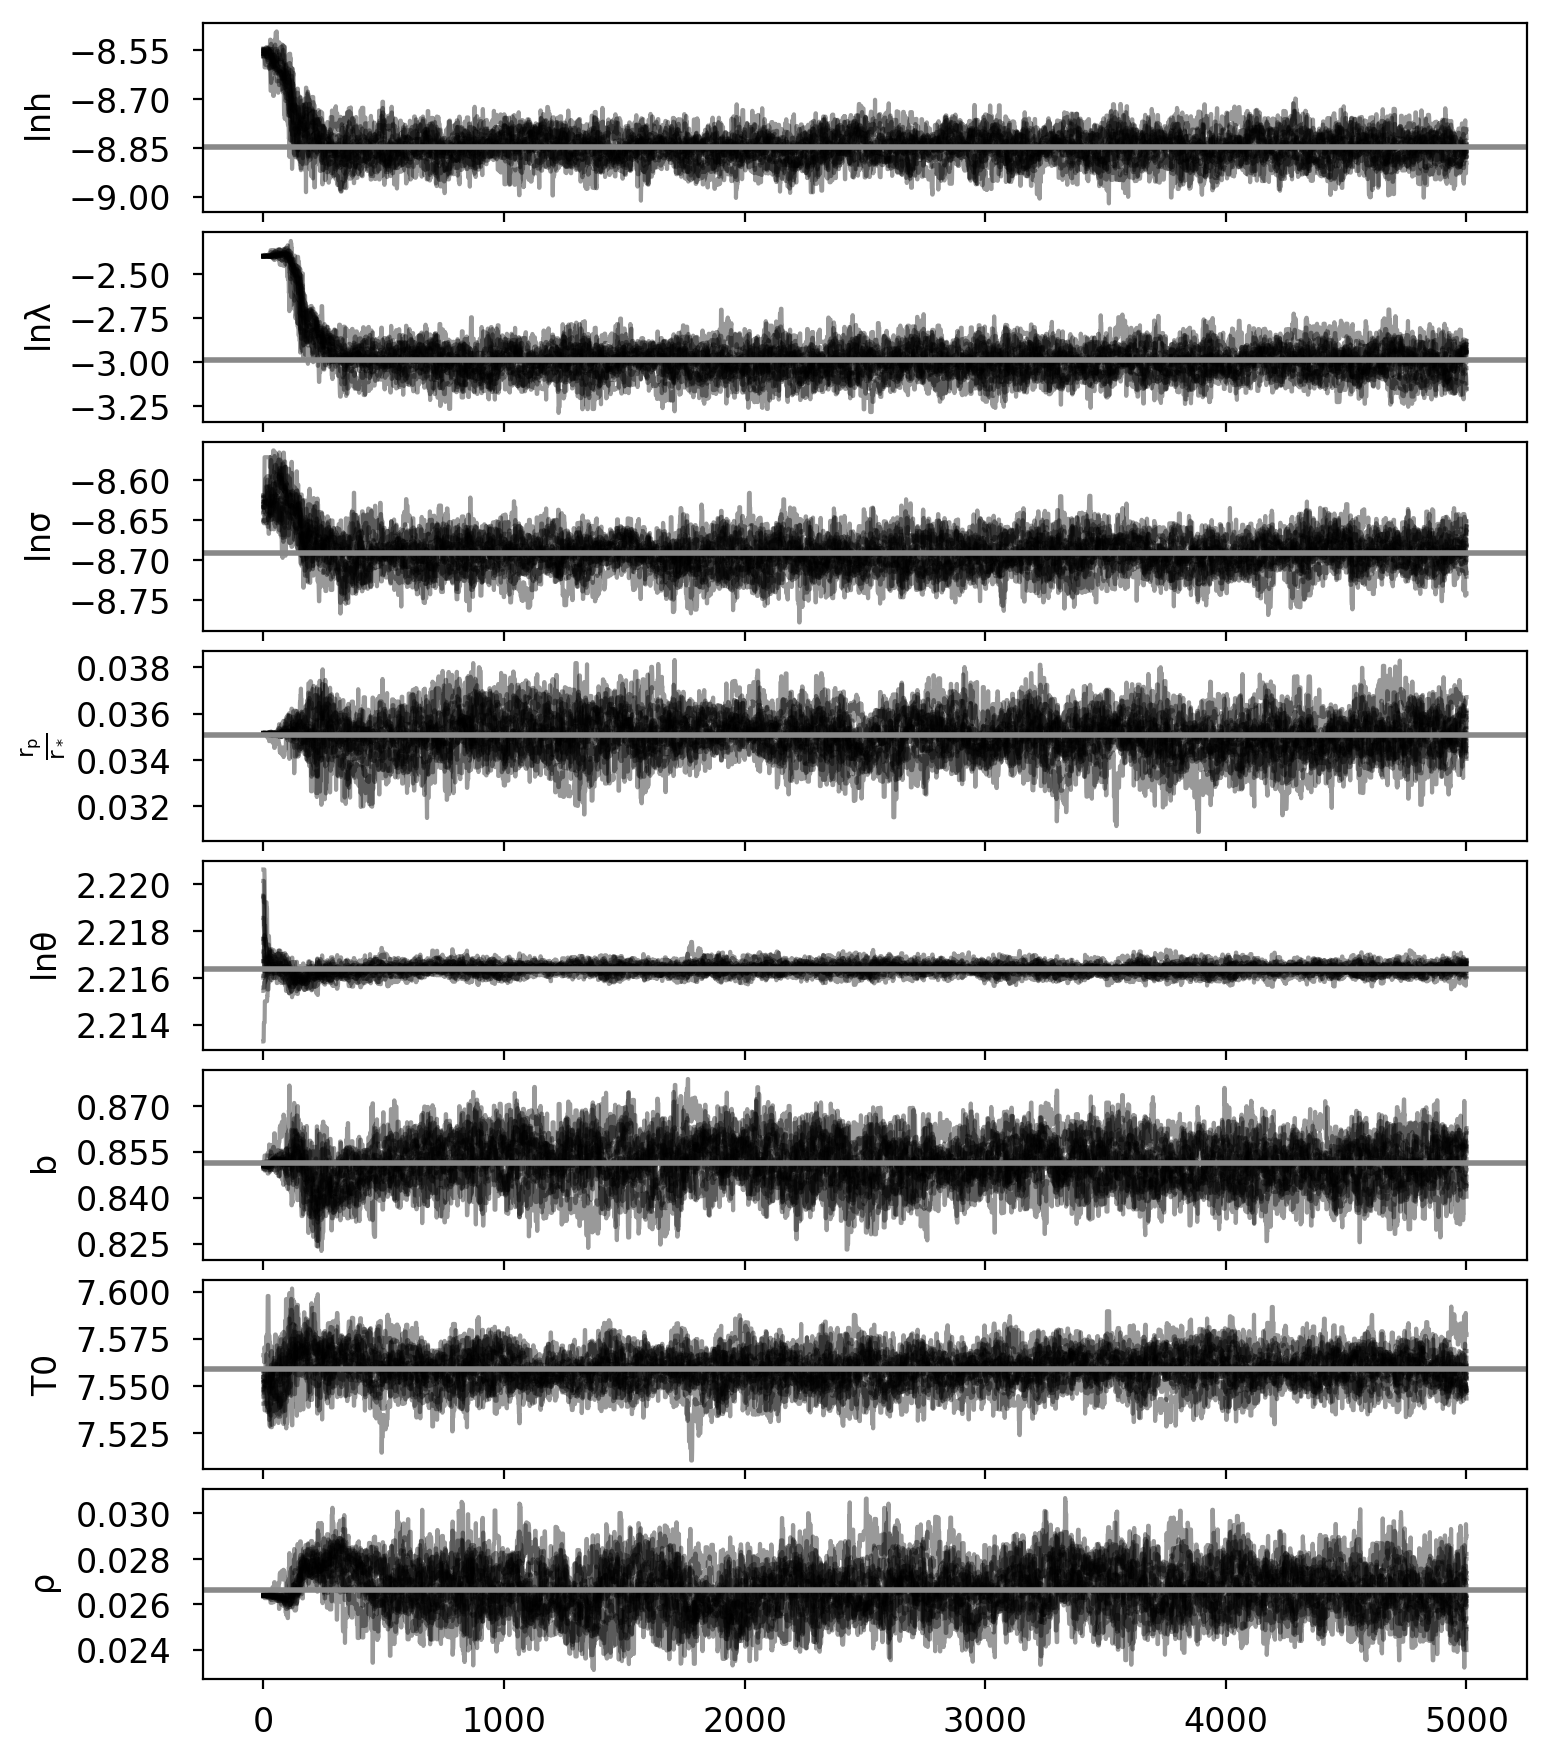

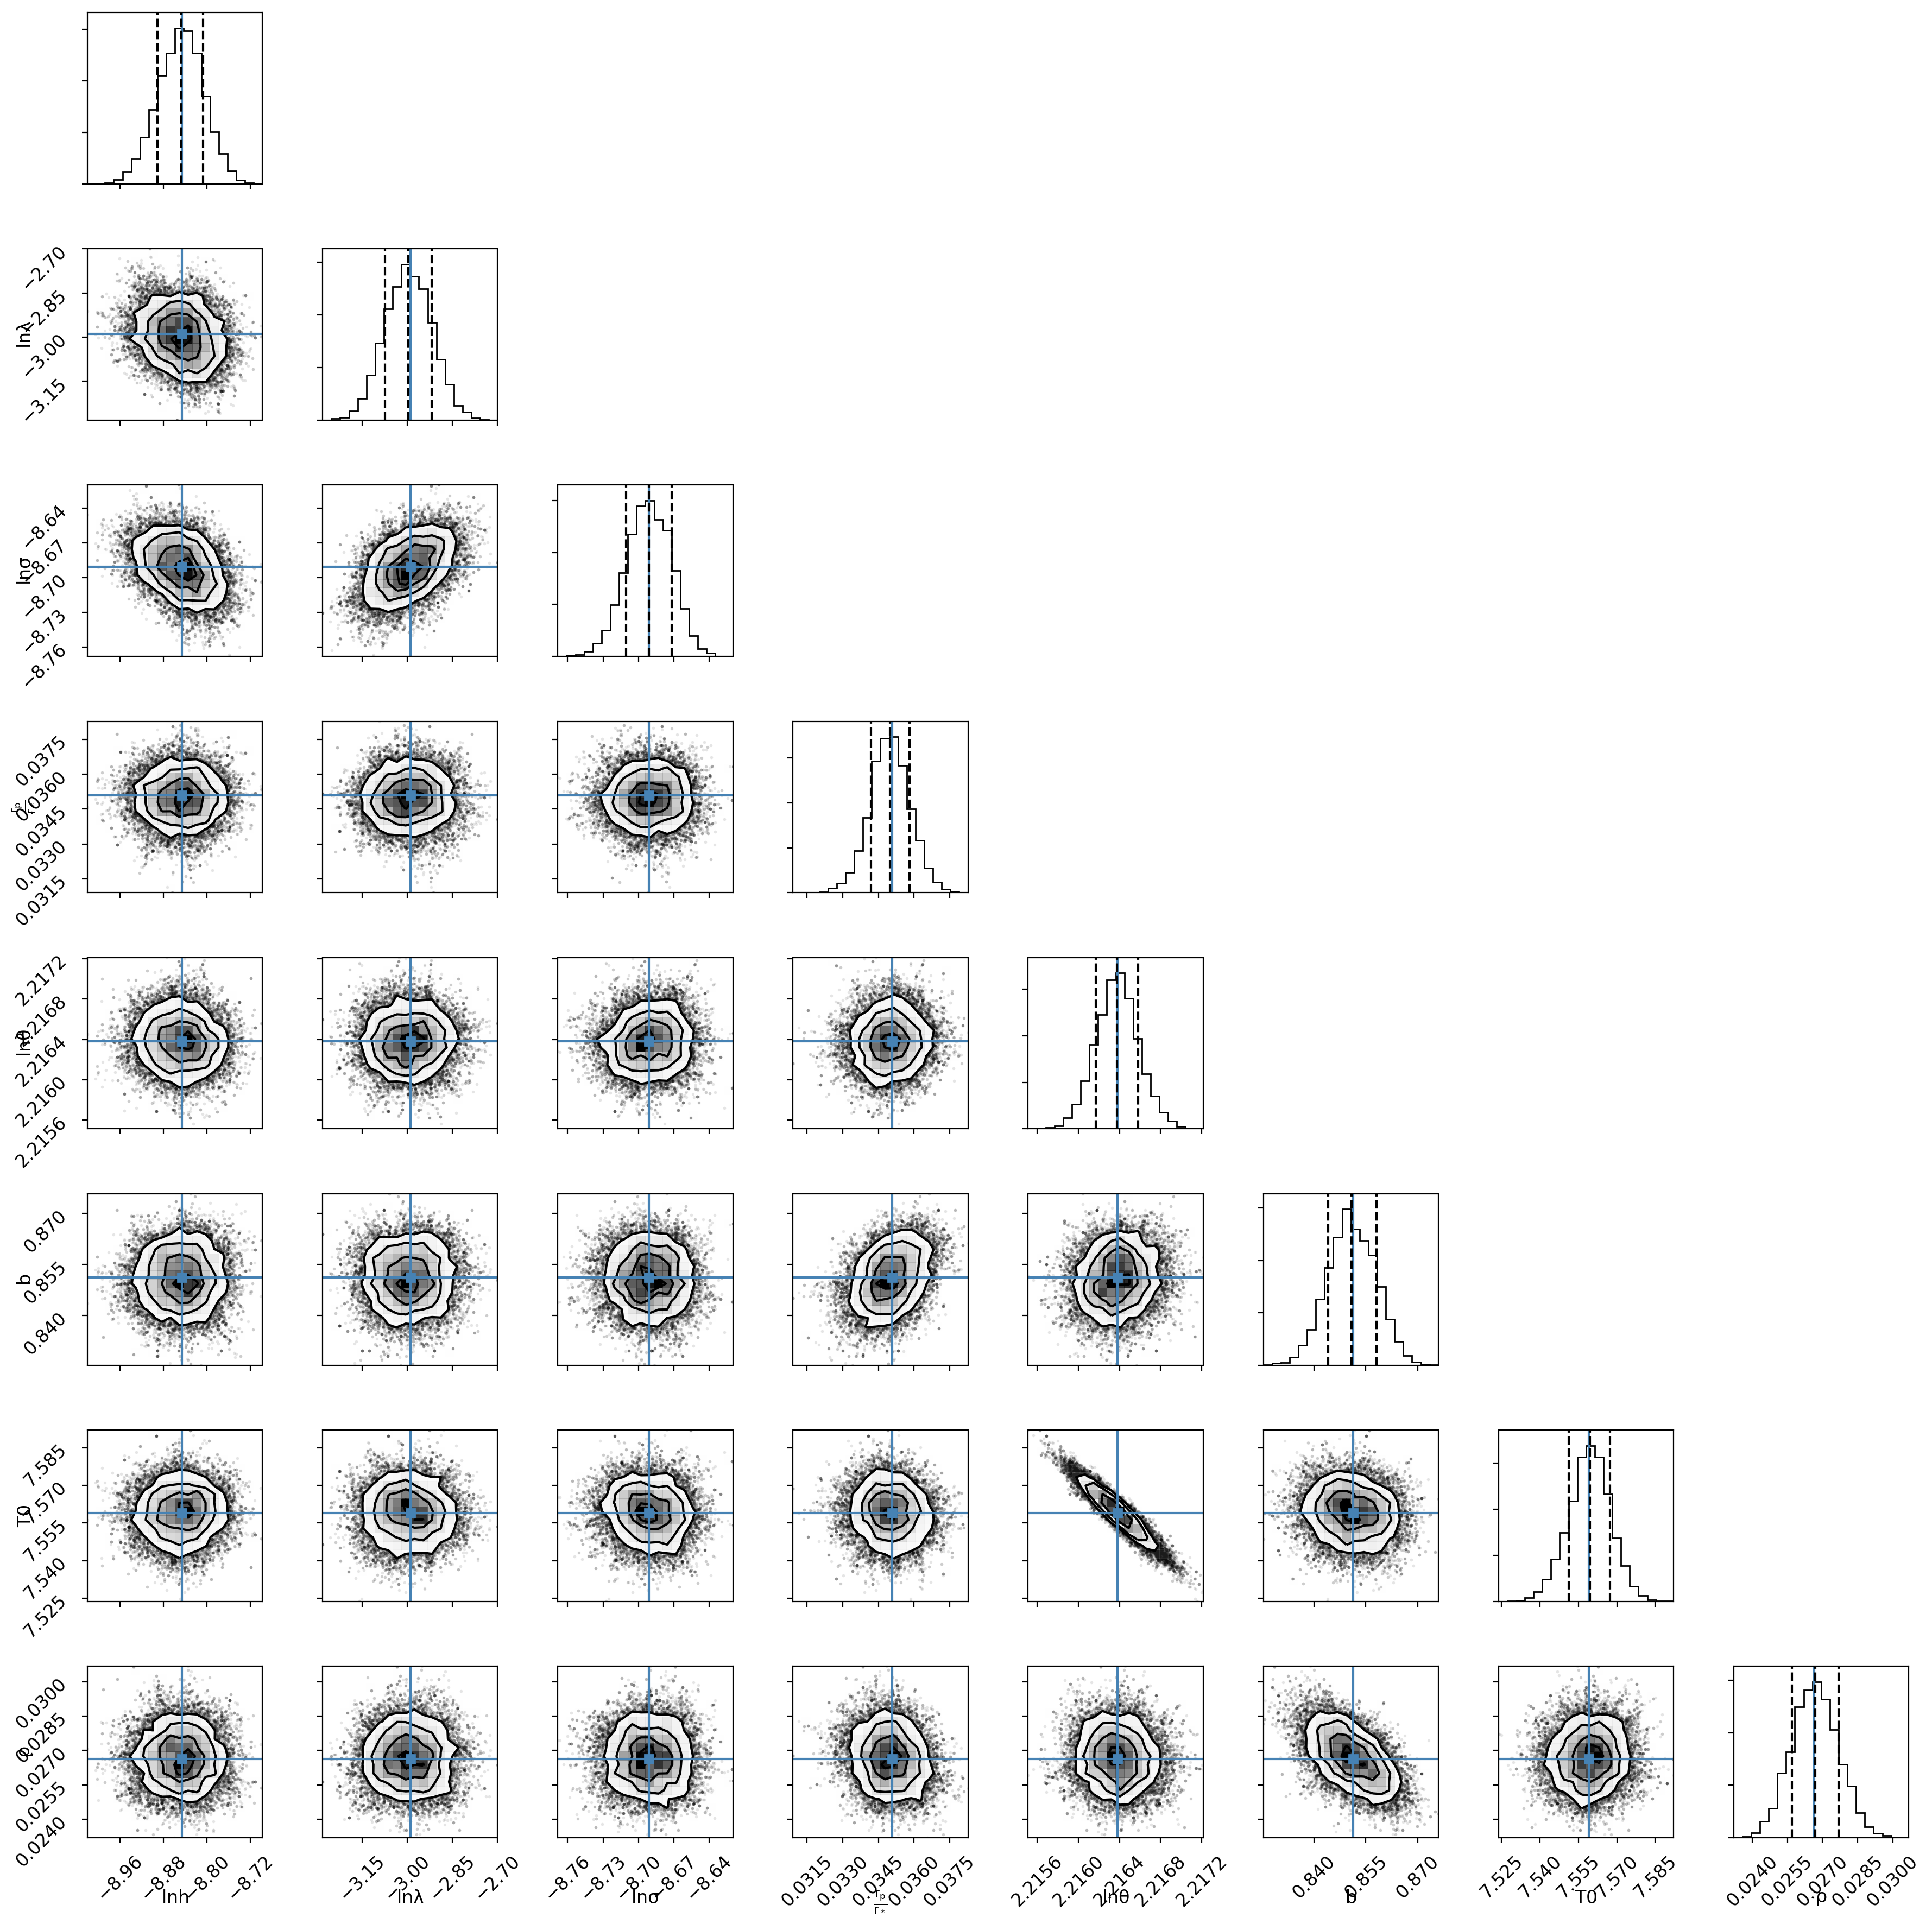

In [3]:
#MCMC

#K2-97
rhotrue= 0.02
#rhosigma = 0.0001
rhosigma = 0.001
pertrue = 8.405
persigma = 0.3
impacttrue = 0.94
impactsigma = 0.05
T0true= 2.4
LD1true = 0.6505
LD2true = 0.1041
LDsigma = 0.1


#EPIC2287
rhotrue = 0.0264
pertrue = 9.17
impacttrue = 0.88
T0true = 7.5

#EPIC20113
#rhotrue = 0.008
#pertrue = 8.66
#impacttrue = 0.3
#T0true = 3.9


#M = ktransit.LCModel()

def lnprior(theta):
    lncov_amp, lncov_length, lnsigma, rprs, lnper, impact, T0, rho = theta
    #lncov_amp, lncov_length, lnsigma, rprs, lnper, impact, T0, rho, LD1, LD2 = theta
    if -12.0 < lncov_amp < 0.0 and -10.0 < lncov_length < 10.0 and -20.0 < lnsigma < 0.0 and 0.0 < rprs < 0.5 \
      and np.log(best_per-0.2) < lnper < np.log(best_per+0.2) and 0.0 < impact < 1.0 + rprs and T0true-2 < T0 < T0true+2:# and 0.0 < LD1 < 1.0 \
      #and 0.0 < LD2 < 1.0:
        return 0.0 - (((rhotrue - rho)/rhosigma)**2/2.)# - (((LD1true - LD1)/LDsigma)**2/2.) - (((LD2true - LD2)/LDsigma)**2/2.) #- (((impacttrue - impact)/impactsigma)**2/2.) #- (((pertrue - per)/persigma)**2/2.) 
    return -np.inf

    #Combine boundary conditions with probability function. Return positive likelihood value.
def lnprob(theta, xpred, x, y, yerr): 
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf  
    #yresid = np.zeros(len(y))
     #chisq = np.zeros(len(y))
    Xpred = scipy.matrix([xpred]).T
    X = scipy.matrix([x]).T

    #make transit model
    M=ktransit.LCModel()
    M.add_star(
        rho=theta[7], # mean stellar density in cgs units
        ld1=0.6505, # ld1--4 are limb darkening coefficients 
        ld2=0.1041, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        #ld1=theta[8],
        #ld2=theta[9],
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
    M.add_planet(
        T0=theta[6],     # a transit mid-time  
        period=np.exp(theta[4]), # an orbital period in days
        impact=theta[5], # an impact parameter
        rprs=theta[3],   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

    
    M.add_data(time=x)

    #vary_star = ['zpt']      # free stellar parameters
    #vary_planet = ([       # free planetary parameters
    #    'rprs'])                # free planet parameters are the same for every planet you model

    #fitT.free_parameters(vary_star)
    #fitT.do_fit()                   # run the fitting

    #fitT.print_results()            # print some results
    #res=fitT.fitresultplanets
    #print "rprs", res['pnum0']['rprs']
    #theta[3] = res['pnum0']['rprs']
    #print( "rprs", theta[3])

    #plot transit model
    
    #plt.clf()
    #plt.subplot(211)
    #plt.plot(x, y)
    #plt.plot(x, fitT.transitmodel)
    #plt.subplot(212)
    #plt.plot(x, y-fitT.transitmodel)
    #plt.show()

    
    #Create y - transit signal matrix: make transit model and subtract it off
    #Y = scipy.matrix([y[i] - theta[-1] * numpy.sin(2 * numpy.pi * (x[i] - 1446.04005)/ 0.35500744) for i in range(len(y))]).T
    Y = scipy.matrix([y - M.transitmodel]).T

    #theta[0] = 0.0
    #theta[2] = 0.0
    #theta[1] = np.log(1e10)

    #calculate GP params using smaller pieces of LC, and then choose median params

    
    dist = scipy.spatial.distance.cdist(X, X, 'sqeuclidean')
    K = scipy.matrix(np.exp(theta[0])**2 * scipy.exp(-dist/(2*np.exp(theta[1])**2)) + np.exp(theta[2])**2 *scipy.identity(X.shape[0]))
    L = scipy.linalg.cho_factor(K)
    b = scipy.linalg.cho_solve(L, Y)
    sign, logKdet = np.linalg.slogdet(K)
        
    loglikelihood = lp - (len(x)/2.)*np.log(2*np.pi) - 0.5 * (Y.T * b) - 0.5 * logKdet 
        #likelihood -= np.log(theta[1]*np.log(365000./0.2)) #Jefferys' prior on period parameter: weights shorter periods more heavily to explore parameter space more fairly
        #likelihood -= np.log(theta[3]*np.log(365000./0.2)) # Jefferys prior on lengthscale parameter
        #likelihood -= np.log(theta[8]*np.log(365000./0.2)) # Jefferys prior on length scale parameter
    #print( "loglikelihood:", loglikelihood)
    return loglikelihood
        
        
        
# Set up the sampler.
trans_par = [rhotrue, res['pnum0']['impact'], res['pnum0']['period'], res['pnum0']['T0'], res['pnum0']['rprs']]
cov_par = [h, lambd, sigma]
merged_par = [np.log(cov_par[0]), np.log(cov_par[1]), np.log(cov_par[2]), trans_par[4], np.log(trans_par[2]), \
              trans_par[1], trans_par[3], trans_par[0]]#, 0.5547, 0.1623]
#ferr=np.ones_like(timesarray) * 0.00008

    
import emcee
#import triangleedit
import time
from matplotlib.ticker import MaxNLocator
ndim, nwalkers = len(merged_par), 16
pos = [merged_par *(1+ 1e-3*np.random.randn(ndim)) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, threads=1,\
args=(xpred,timesarray,flux,ferr)) 
    
# Time an MCMC step, and estimate length of time to run chain.
t = time.time()
sampler.run_mcmc(pos, 1, rstate0=np.random.get_state())
tstep = time.time()-t
Nsteps = 5000
from time import localtime, strftime
tstart = strftime("%a, %d %b %Y %H:%M:%S", localtime())
print("""MCMC step runtime (in seconds): {0}
        MCMC estimated total runtime (in seconds): {1}
        Start time: {2}
        """.format(tstep, tstep * Nsteps, tstart))

# Clear and run the production chain.
print("Running MCMC...")
sampler.run_mcmc(pos, Nsteps, rstate0=np.random.get_state())
print("Done.")
print( "End time:", strftime("%a, %d %b %Y %H:%M:%S", localtime()))

burnin = 2500
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))

#save all chains as txt file
#np.savetxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287allchains.txt', samples)
#np.savetxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC201132839/2011SEallchains.txt', samples)

# #make and save planetmass chains as txt file
# f = open('epic2113_stellarsamples.txt')
# e = f.read()

# g = e.split('\n')

# h = []
# for i in range(len(g)):
#     h.append(g[i].split())
# hh = np.asarray(h[1:-1])
# starrad = np.array([float(i) for i in hh[:,1]])


radsamples = sampler.chain[:, burnin:, 3].flatten()
# radchain = radsamples[:len(starrad)] * starrad * 6.955e5 / 69911. #in Rjup
#radchain = radsamples * starrad[:len(radsamples)] * 6.955e5 / 69911. #in Rjup, when radsamples < 10000

#np.savetxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287rprssamples.txt',radsamples)
#np.savetxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC201132839/2011rprssamples.txt',radsamples)
# np.savetxt('planetrads.txt', radchain)

[cov_amp_mcmc, cov_length_mcmc, sigma_mcmc, \
    rprs_mcmc, lnper_mcmc, impact_mcmc, T0_mcmc, rho_mcmc] = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84], axis=0)))  #, LD1_mcmc, LD2_mcmc]
print("""MCMC result:
lncov_amp = {0[0]} +{0[1]} -{0[2]} 
lncov_length = {1[0]} +{1[1]} -{1[2]}
lnsigma = {2[0]} +{2[1]} -{2[2]} 
rprs = {3[0]} +{3[1]} -{3[2]}
lnperiod = {4[0]} +{4[1]} -{4[2]} 
impact = {5[0]} +{5[1]} -{5[2]}
T0 = {6[0]} +{6[1]} -{6[2]} 
rho = {7[0]} +{7[1]} -{7[2]}
""".format(cov_amp_mcmc, cov_length_mcmc, sigma_mcmc, rprs_mcmc,\
           lnper_mcmc, impact_mcmc, T0_mcmc, rho_mcmc))#, LD1_mcmc, LD2_mcmc))
#LD1 = {8[0]} +{8[1]} -{8[2]} 
#LD2 = {9[0]} +{9[1]} -{9[2]}
print("Mean acceptance fraction: {0:.3f}"
        .format(np.mean(sampler.acceptance_fraction)))


Teff = 60*np.random.randn(100000) + 4840. #add errors of Torres et al in quadrature
FeH = 0.04*np.random.randn(100000) - 0.01
numax = 5.4*np.random.randn(100000) + 244.1 #inflate errors?
dnu = 0.08*np.random.randn(100000) + 18.48

Teffsun = 5777
numaxsun = 3100
dnusun = 135

Mstar = np.zeros_like(Teff)
Rstar = np.zeros_like(Teff)
rhostar = np.zeros_like(Teff)
logg = np.zeros_like(Teff)
Rp = np.zeros_like(radsamples)

for i in range (len(Teff)):
    Mstar[i] = (numax[i] / numaxsun)**3 * (dnu[i] / dnusun)**(-4) * (Teff[i] / Teffsun)**(3/2)
    Rstar[i] = (numax[i] / numaxsun) * (dnu[i] / dnusun)**(-2) * (Teff[i] / Teffsun)**(1/2)
    rhostar[i] = 1.41 * (Mstar[i] / Rstar[i]**3)
    logg[i] = 4.43812 + np.log10(Mstar[i] / Rstar[i]**2)


    
#then use this to calculate planet radius with errors
for i in range(len(radsamples)):
    Rp[i] = radsamples[i] * Rstar[i] * 6.95e5 / 71492
plt.hist(Rp)
plt.xlabel('Planet Radius(Rjup)')
plt.show()

np.savetxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287SEGPrads.txt',Rp)


plt.clf()
fig, axes = plt.subplots(len(merged_par), 1, sharex=True, figsize=(8, 9))
axes[0].plot((sampler.chain[:, :, 0].T), color="k", alpha=0.4)
axes[0].yaxis.set_major_locator(MaxNLocator(5))
axes[0].axhline(np.median(sampler.chain[:, :, 0].T), color="#888888", lw=2)
axes[0].set_ylabel(r"ln$h$")
    
axes[1].plot((sampler.chain[:, :, 1].T), color="k", alpha=0.4)
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].axhline(np.median(sampler.chain[:, :, 1].T), color="#888888", lw=2)
axes[1].set_ylabel(r"ln$\lambda$")

axes[2].plot((sampler.chain[:, :, 2].T), color="k", alpha=0.4)
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].axhline(np.median(sampler.chain[:, :, 2].T), color="#888888", lw=2)
axes[2].set_ylabel(r"ln$\sigma$")
    
axes[3].plot((sampler.chain[:, :, 3].T), color="k", alpha=0.4)
axes[3].yaxis.set_major_locator(MaxNLocator(5))
axes[3].axhline(np.median(sampler.chain[:, :, 3].T), color="#888888", lw=2)
axes[3].set_ylabel(r"$\frac{r_p}{r_*}$")

axes[4].plot((sampler.chain[:, :, 4].T), color="k", alpha=0.4)
axes[4].yaxis.set_major_locator(MaxNLocator(5))
axes[4].axhline(np.median(sampler.chain[:, :, 4].T), color="#888888", lw=2)
axes[4].set_ylabel(r"ln$\theta$")

axes[5].plot((sampler.chain[:, :, 5].T), color="k", alpha=0.4)
axes[5].yaxis.set_major_locator(MaxNLocator(5))
axes[5].axhline(np.median(sampler.chain[:, :, 5].T), color="#888888", lw=2)
axes[5].set_ylabel(r"$b$")

axes[6].plot((sampler.chain[:, :, 6].T), color="k", alpha=0.4)
axes[6].yaxis.set_major_locator(MaxNLocator(5))
axes[6].axhline(np.median(sampler.chain[:, :, 6].T), color="#888888", lw=2)
axes[6].set_ylabel(r"$T0$")

axes[7].plot((sampler.chain[:, :, 7].T), color="k", alpha=0.4)
axes[7].yaxis.set_major_locator(MaxNLocator(5))
axes[7].axhline(np.median(sampler.chain[:, :, 7].T), color="#888888", lw=2)
axes[7].set_ylabel(r"$\rho$")

#axes[8].plot(abs(sampler.chain[:, :, 8].T), color="k", alpha=0.4)
#axes[8].yaxis.set_major_locator(MaxNLocator(5))
#axes[8].axhline(np.median(sampler.chain[:, :, 8].T), color="#888888", lw=2)
#axes[8].set_ylabel(r"$LD1$")

#axes[9].plot(abs(sampler.chain[:, :, 9].T), color="k", alpha=0.4)
#axes[9].yaxis.set_major_locator(MaxNLocator(5))
#axes[9].axhline(np.median(sampler.chain[:, :, 9].T), color="#888888", lw=2)
#axes[9].set_ylabel(r"$LD2$")
    
fig.tight_layout(h_pad=0.0)
#fig.savefig("/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287intransitchainSE.png")
#fig.savefig("/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC201132839/2011intransitchainSE.png")
plt.show()
    
import corner
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


majorFormatter = FormatStrFormatter('%.2f')
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(majorFormatter)

plt.clf()
plt.rcParams["font.size"] = 12
#plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.sans-serif"] = ["Computer Modern Sans"]
#plt.rcParams["text.usetex"] = True
#plt. rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
#plt.rcParams['font.size']=18  
fig = corner.corner(samples, labels=[r"ln$h$", r"ln$\lambda$", r"ln$\sigma$", r"$\frac{r_p}{r_*}$", r"ln$\theta$", r"$b$", r"$T0$",r"$\rho$"], quantiles=[0.16, 0.5, 0.84],
                      truths=[np.median(sampler.chain[:, :, 0].T), np.median(sampler.chain[:, :, 1].T), np.median(sampler.chain[:, :, 2].T), \
                              np.median(sampler.chain[:, :, 3].T), np.median(sampler.chain[:, :, 4].T), np.median(sampler.chain[:, :, 5].T), \
                              np.median(sampler.chain[:, :, 6].T), np.median(sampler.chain[:, :, 7].T)])#, np.median(sampler.chain[:, :, 8].T), np.median(sampler.chain[:, :, 9].T)]) #, "$\gamma_1$", "$\gamma_2$"]
    
fig.tight_layout()                            
#fig.savefig("/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287SEtriangle.png")
#fig.savefig("/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC201132839/2011SEtriangle.png")
plt.show()


In [4]:
import numpy as np
Rp = np.loadtxt('/Users/samuelgrunblatt/Desktop/reinflationpaper/EPIC228754001/2287SEGPrads.txt')
#plt.hist(Rp, label='SE GP model', hatch='/', lw=2, histtype='step')
#plt.hist()
percentiles = np.percentile(Rp, [16,50,84], axis=0)
print(percentiles)

[ 1.26913589  1.31324338  1.35795765]
